In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

[Dataset description](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)  
[Cleaned up csv file](https://www.kaggle.com/altavish/boston-housing-dataset)

In [2]:
flc = '/Users/pinqingkan/Desktop/Codes/Course_ISLR/data/'
fname = flc + 'HousingData.csv'

In [3]:
X = pd.read_csv(fname)

10 - (a) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [4]:
X.shape

(506, 14)

In [5]:
X = X.dropna(axis = 0, how = 'any')

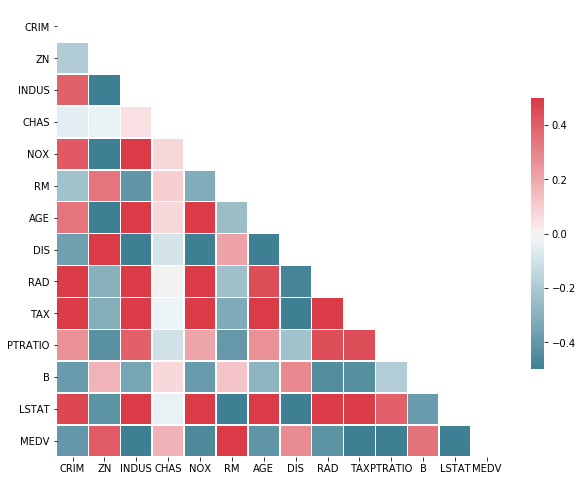

In [6]:
Y = X.corr()
plt.figure(figsize = (10, 10))
# Generate a mask for the upper triangle
mask = np.zeros_like(Y, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Y, mask=mask, cmap=cmap, vmax=.5, vmin = -.5, linewidths=.5, square=True, cbar_kws={"shrink": .5})

10 - (b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

In [7]:
fcols = list(X.columns)
fcols.remove('CHAS')

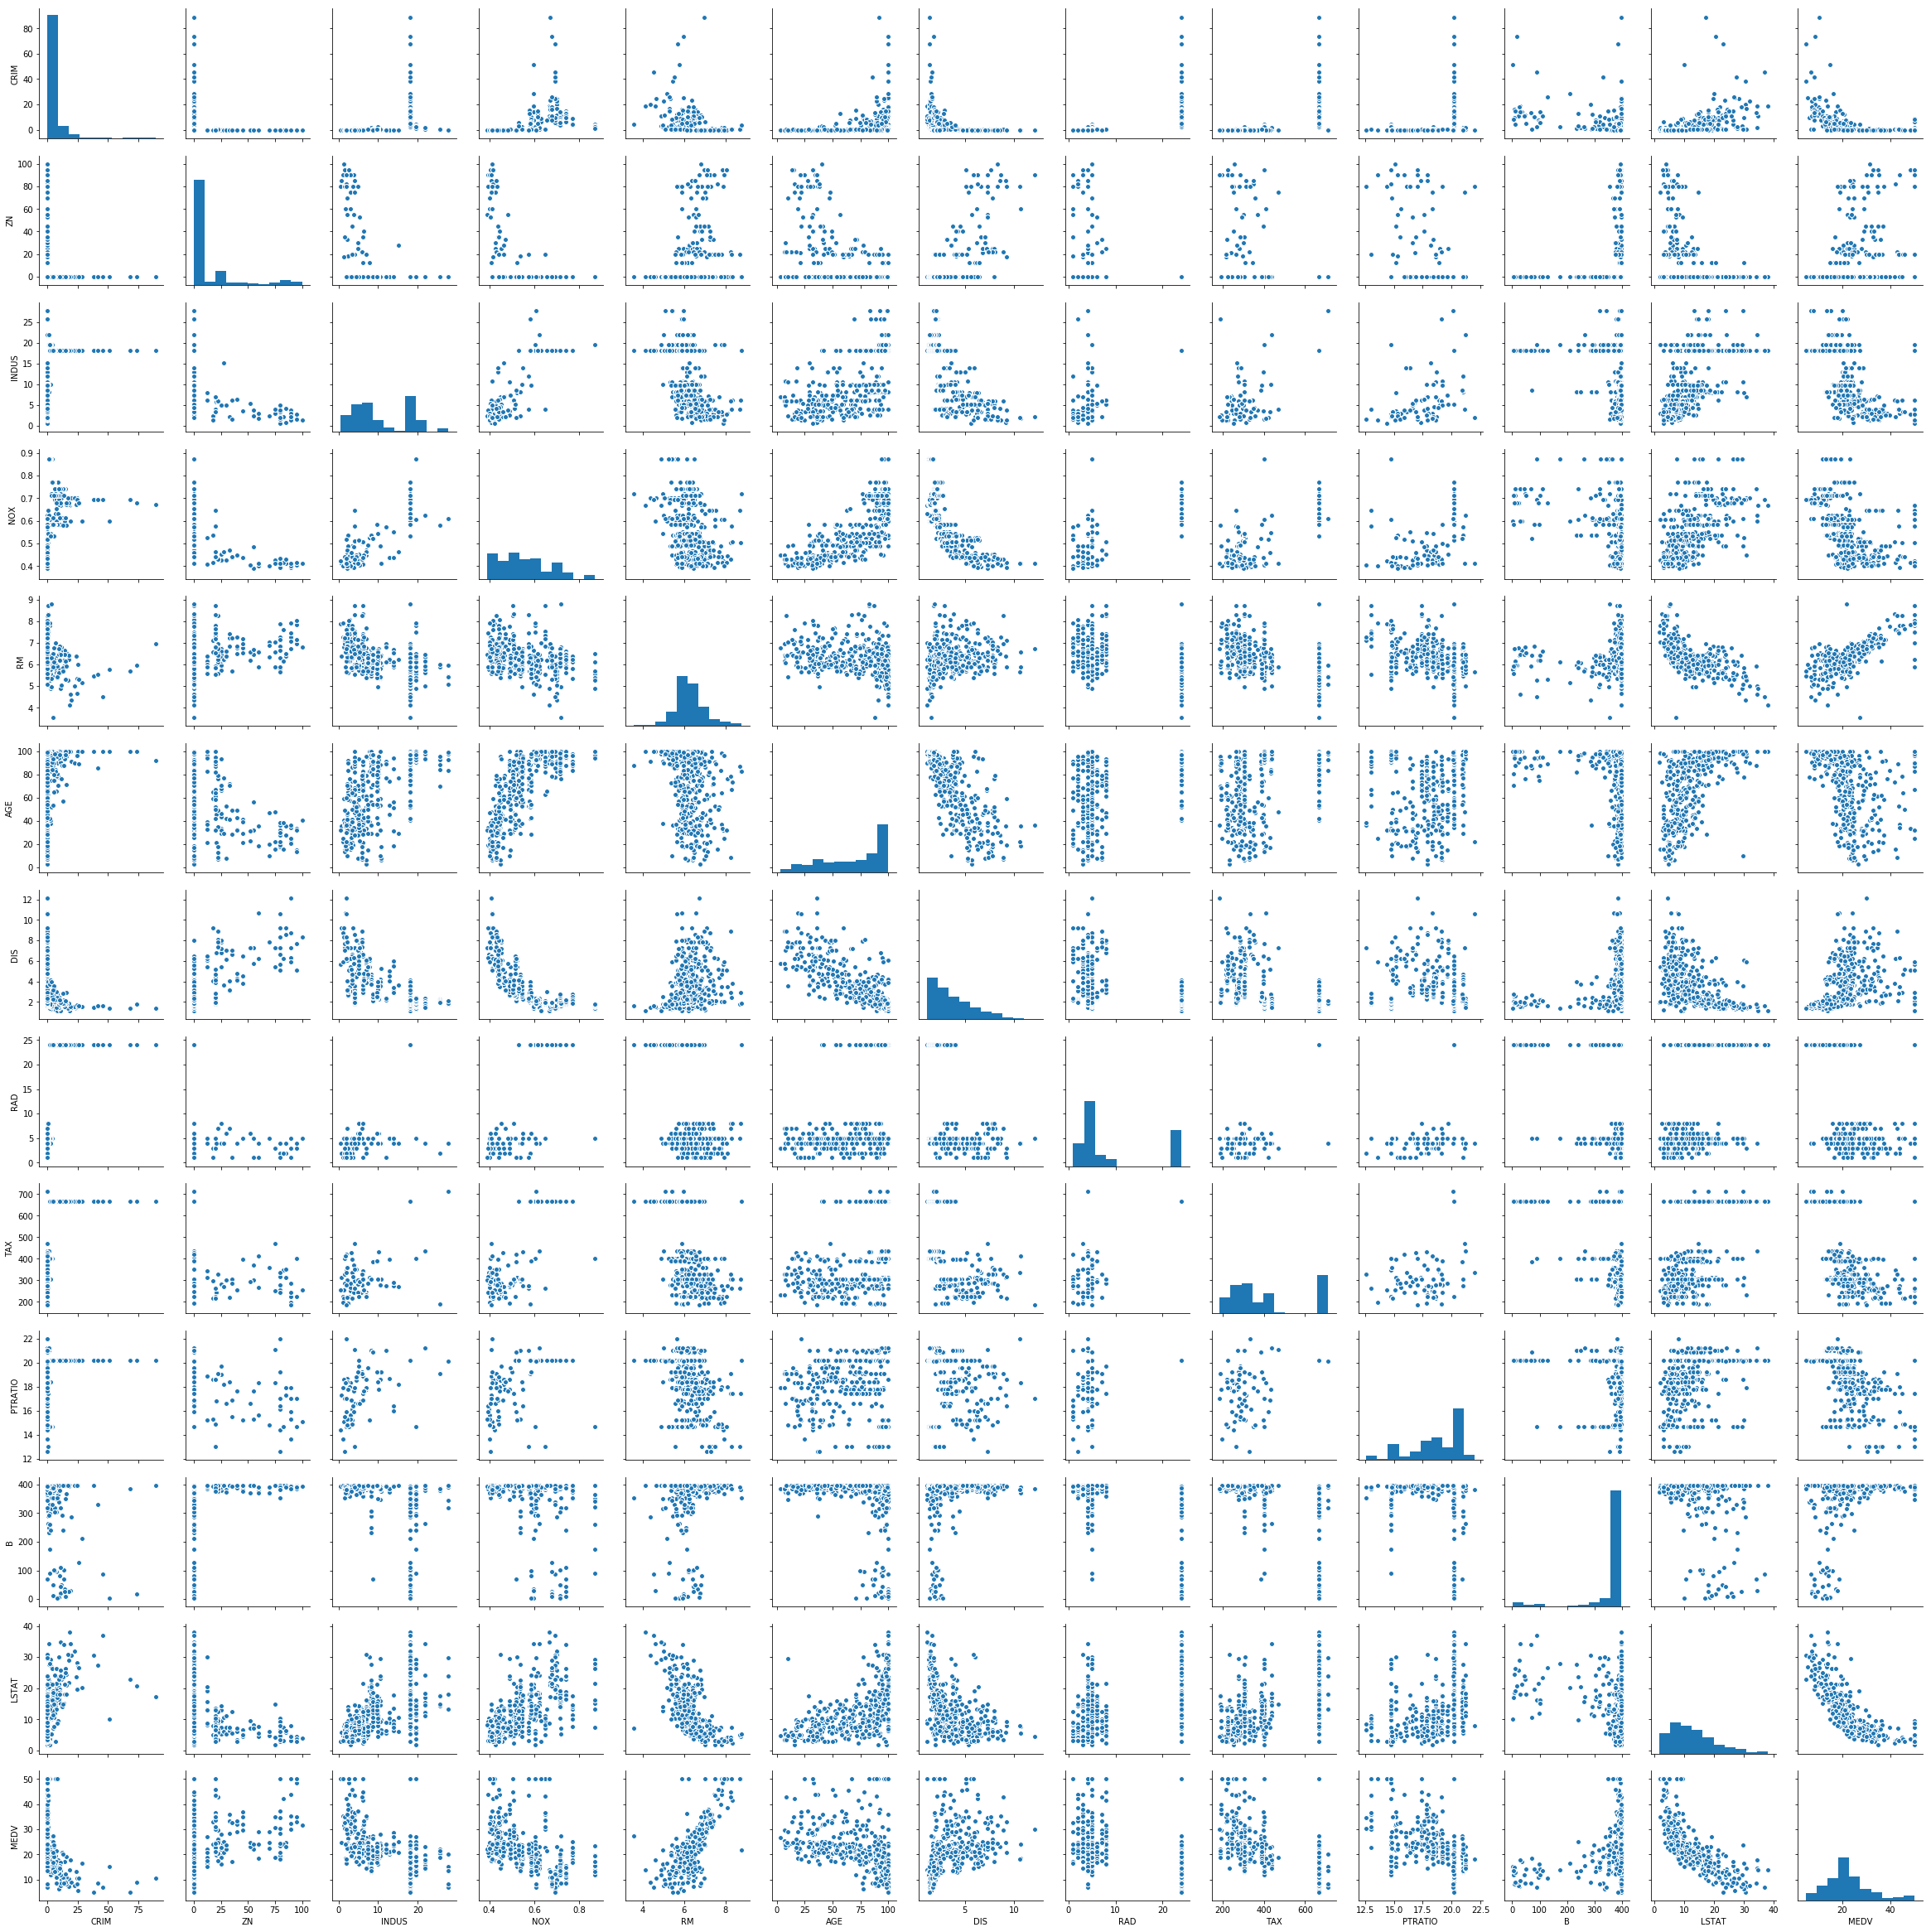

In [8]:
sns.pairplot(X[fcols])

10 - (c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.  
10 - (d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

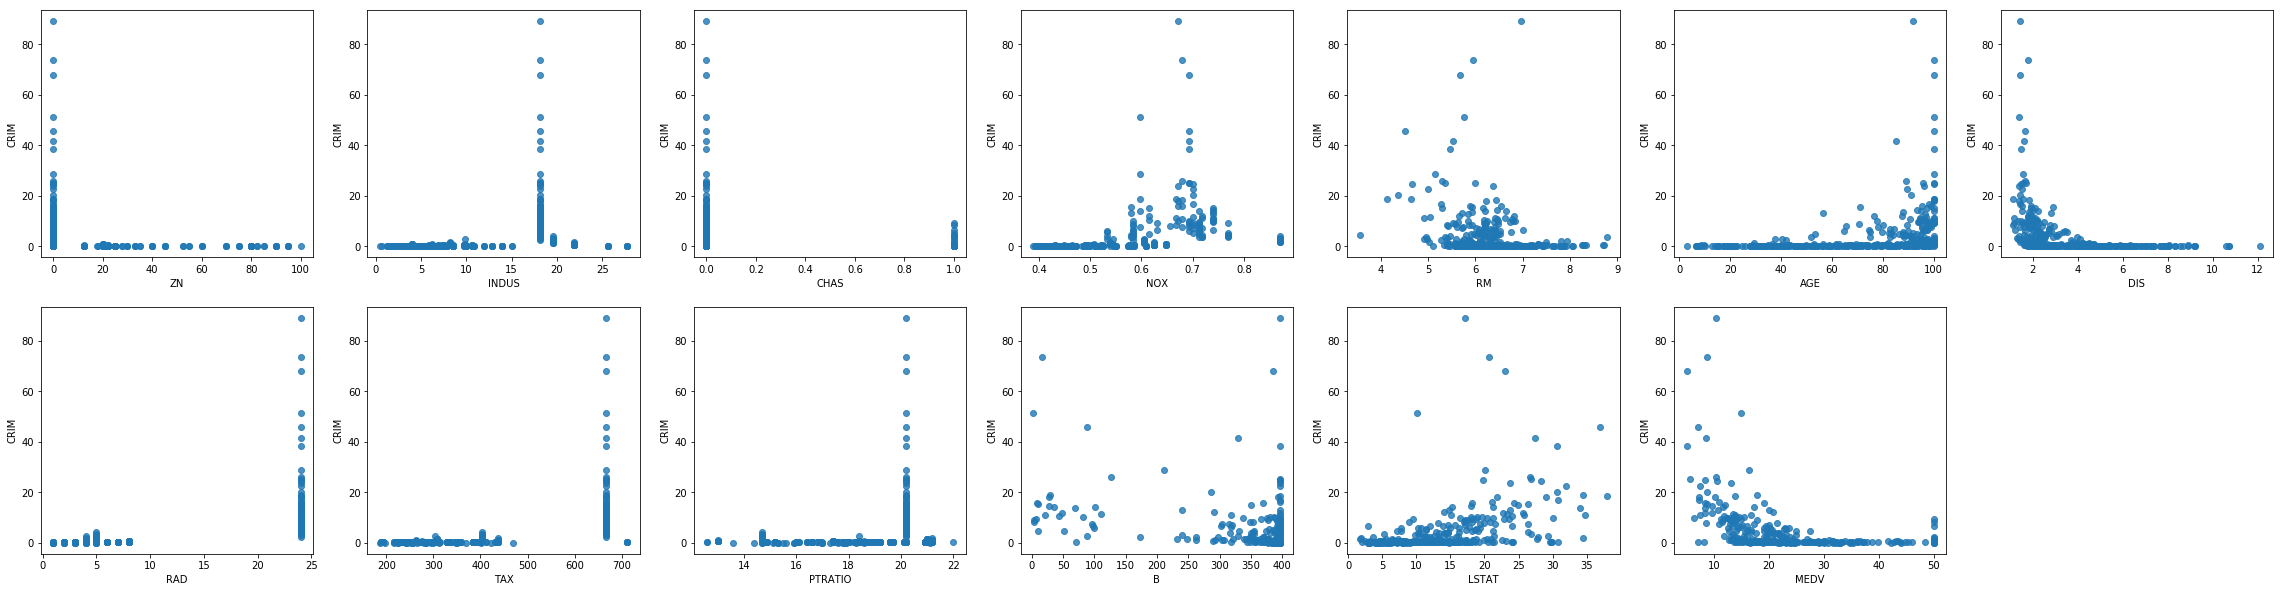

In [9]:
cnt = 0
plt.figure(figsize = (40, 10))
for icol in X.columns:
    if icol == 'CRIM': continue
    cnt += 1
    plt.subplot(2, 7, cnt)
    sns.regplot(x = icol, y = 'CRIM', data = X, fit_reg = False)

10 - (e) How many of the suburbs in this data set bound the Charles river?

In [10]:
Nrow, Ncol = X.shape
print(X['CHAS'].sum())
X['CHAS'].sum() / Nrow

27.0


0.06852791878172589

10 - (f) What is the median pupil-teacher ratio among the towns in this data set?

In [11]:
X['PTRATIO'].median()

19.1

10 - (g) Which suburb of Boston has lowest median value of owner- occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [12]:
icol

'MEDV'

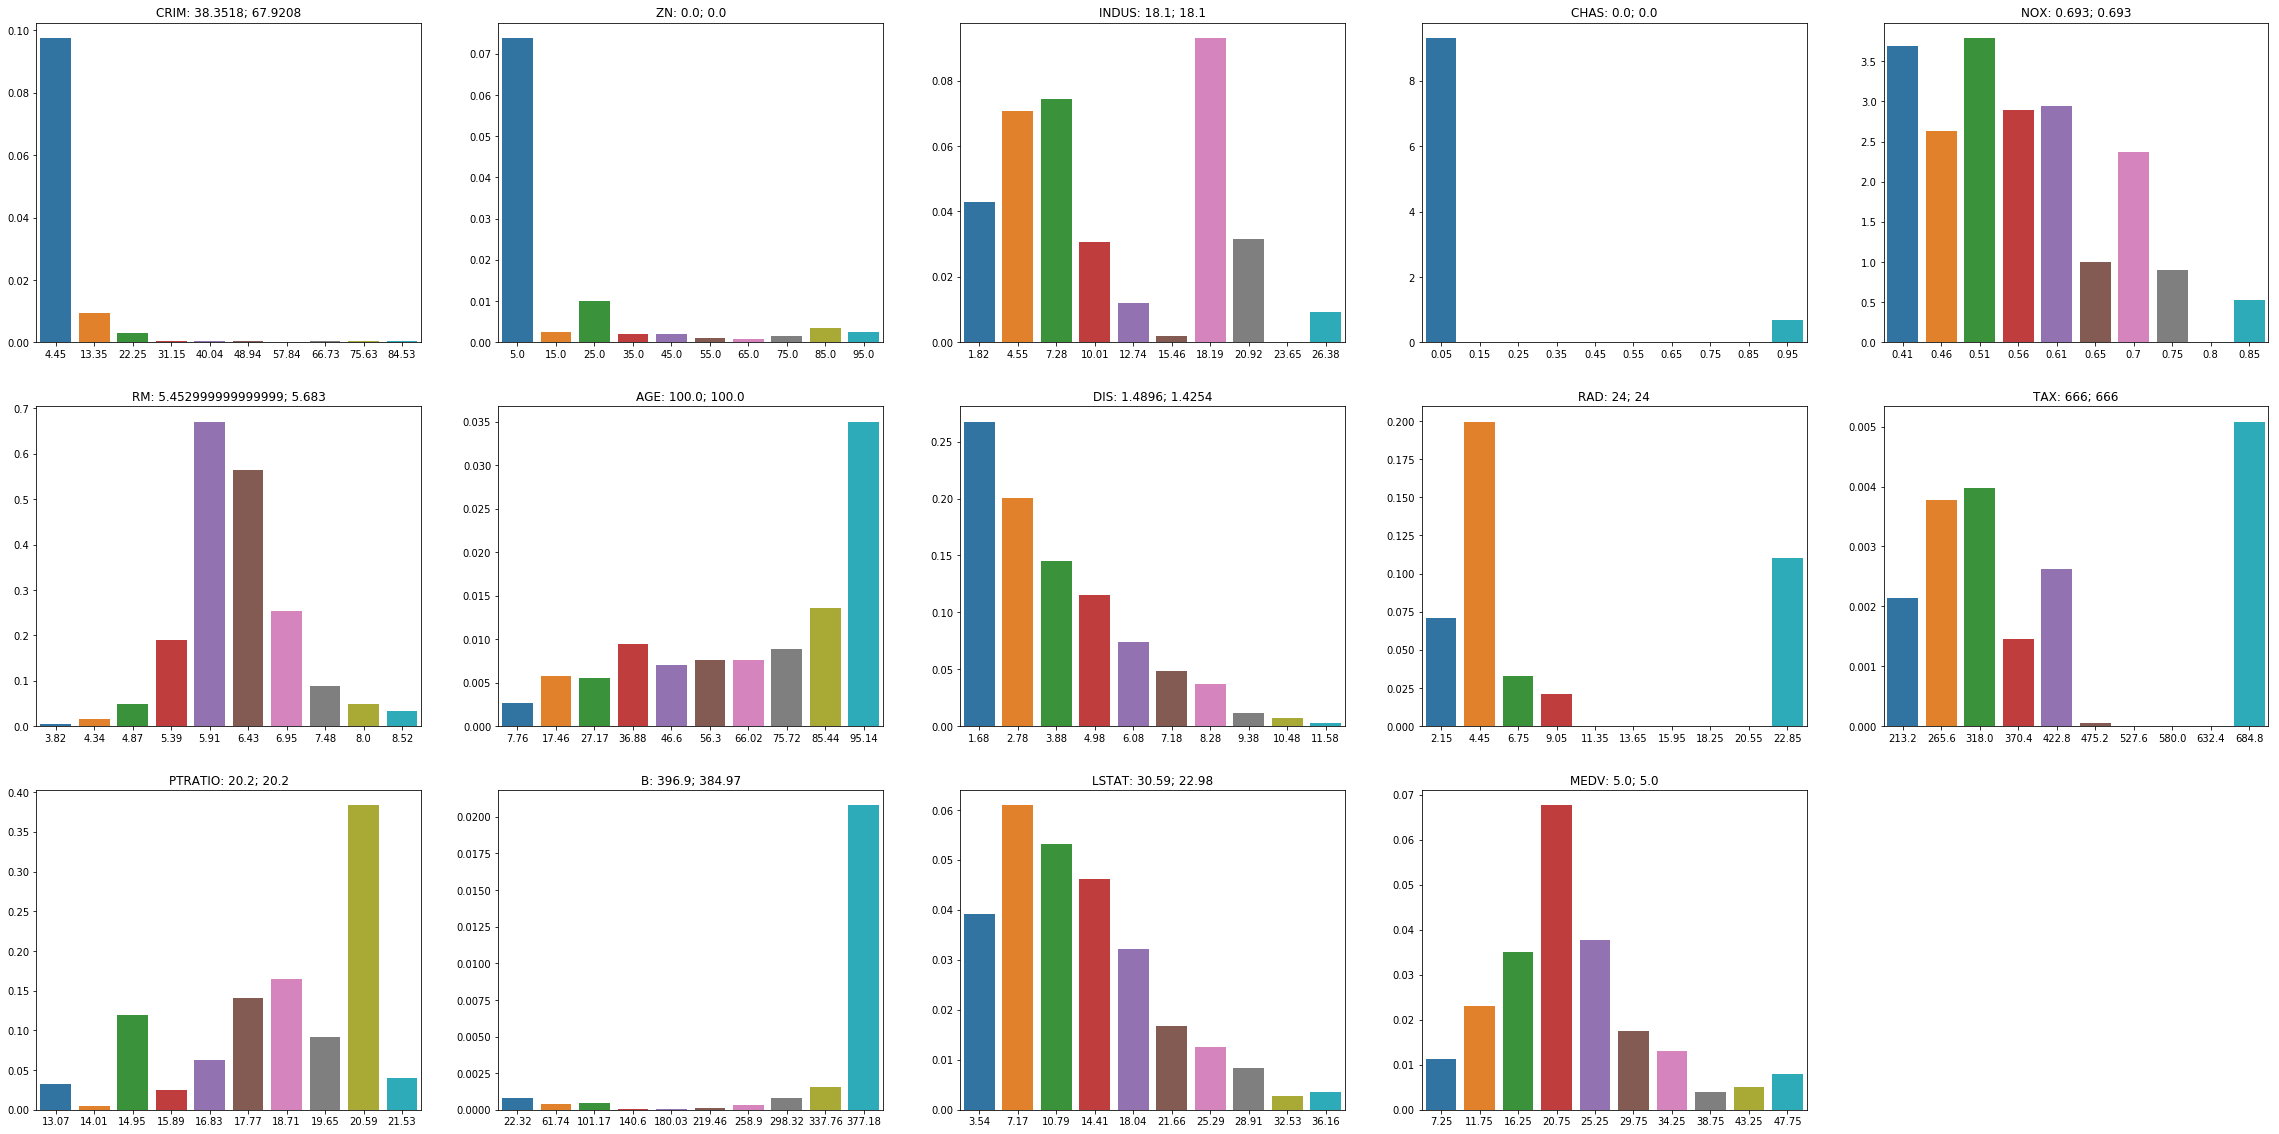

In [13]:
ix = X[X['MEDV'] == X['MEDV'].min()]
plt.figure(figsize = (40, 20))
cnt = 0
for icol in range(Ncol):
    cnt += 1
    plt.subplot(3, 5, cnt)
    idata = X.iloc[:, icol].values
    hist, binedges = np.histogram(idata, density = True)
    #plt.bar((binedges[:-1] + binedges[1:]) / 2, hist)
    #plt.plot([ix[icol], ix[icol]], [0, max(hist) * 1.1], 'k')
    xx = (binedges[:-1] + binedges[1:]) / 2
    xx = xx.round(decimals = 2)
    sns.barplot(xx, hist)
    fttl = X.columns[icol] + ': '
    for ival in ix.iloc[:, icol].values:
        fttl += (str(ival) + '; ')
    plt.title(fttl[:-2])

10 - (h) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [14]:
Y = X['RM'].copy()
ymin = math.floor(Y.min())
ymax = math.floor(Y.max())
xx = np.arange(ymin, ymax + 1)
yy = np.zeros(len(xx))
cnt = 0
for i in xx:
    yy[cnt] = (Y > i).sum()
    cnt += 1
yy /= Nrow
yy2 = np.hstack((yy[:-1] - yy[1:], yy[-1]))

Text(0.5,1,'N < RM <= N+1')

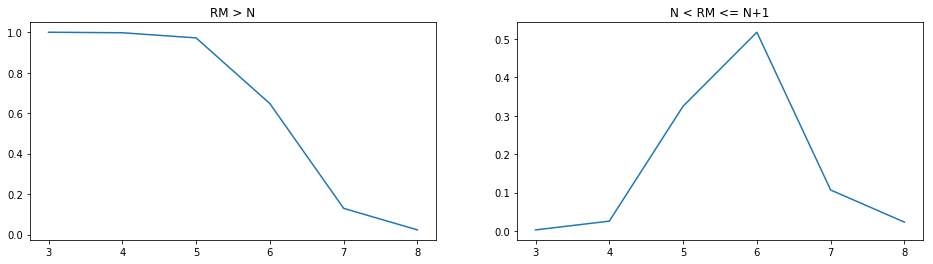

In [15]:
plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
plt.plot(xx, yy)
plt.title('RM > N')
plt.subplot(1, 2, 2)
plt.plot(xx, yy2)
plt.title('N < RM <= N+1')

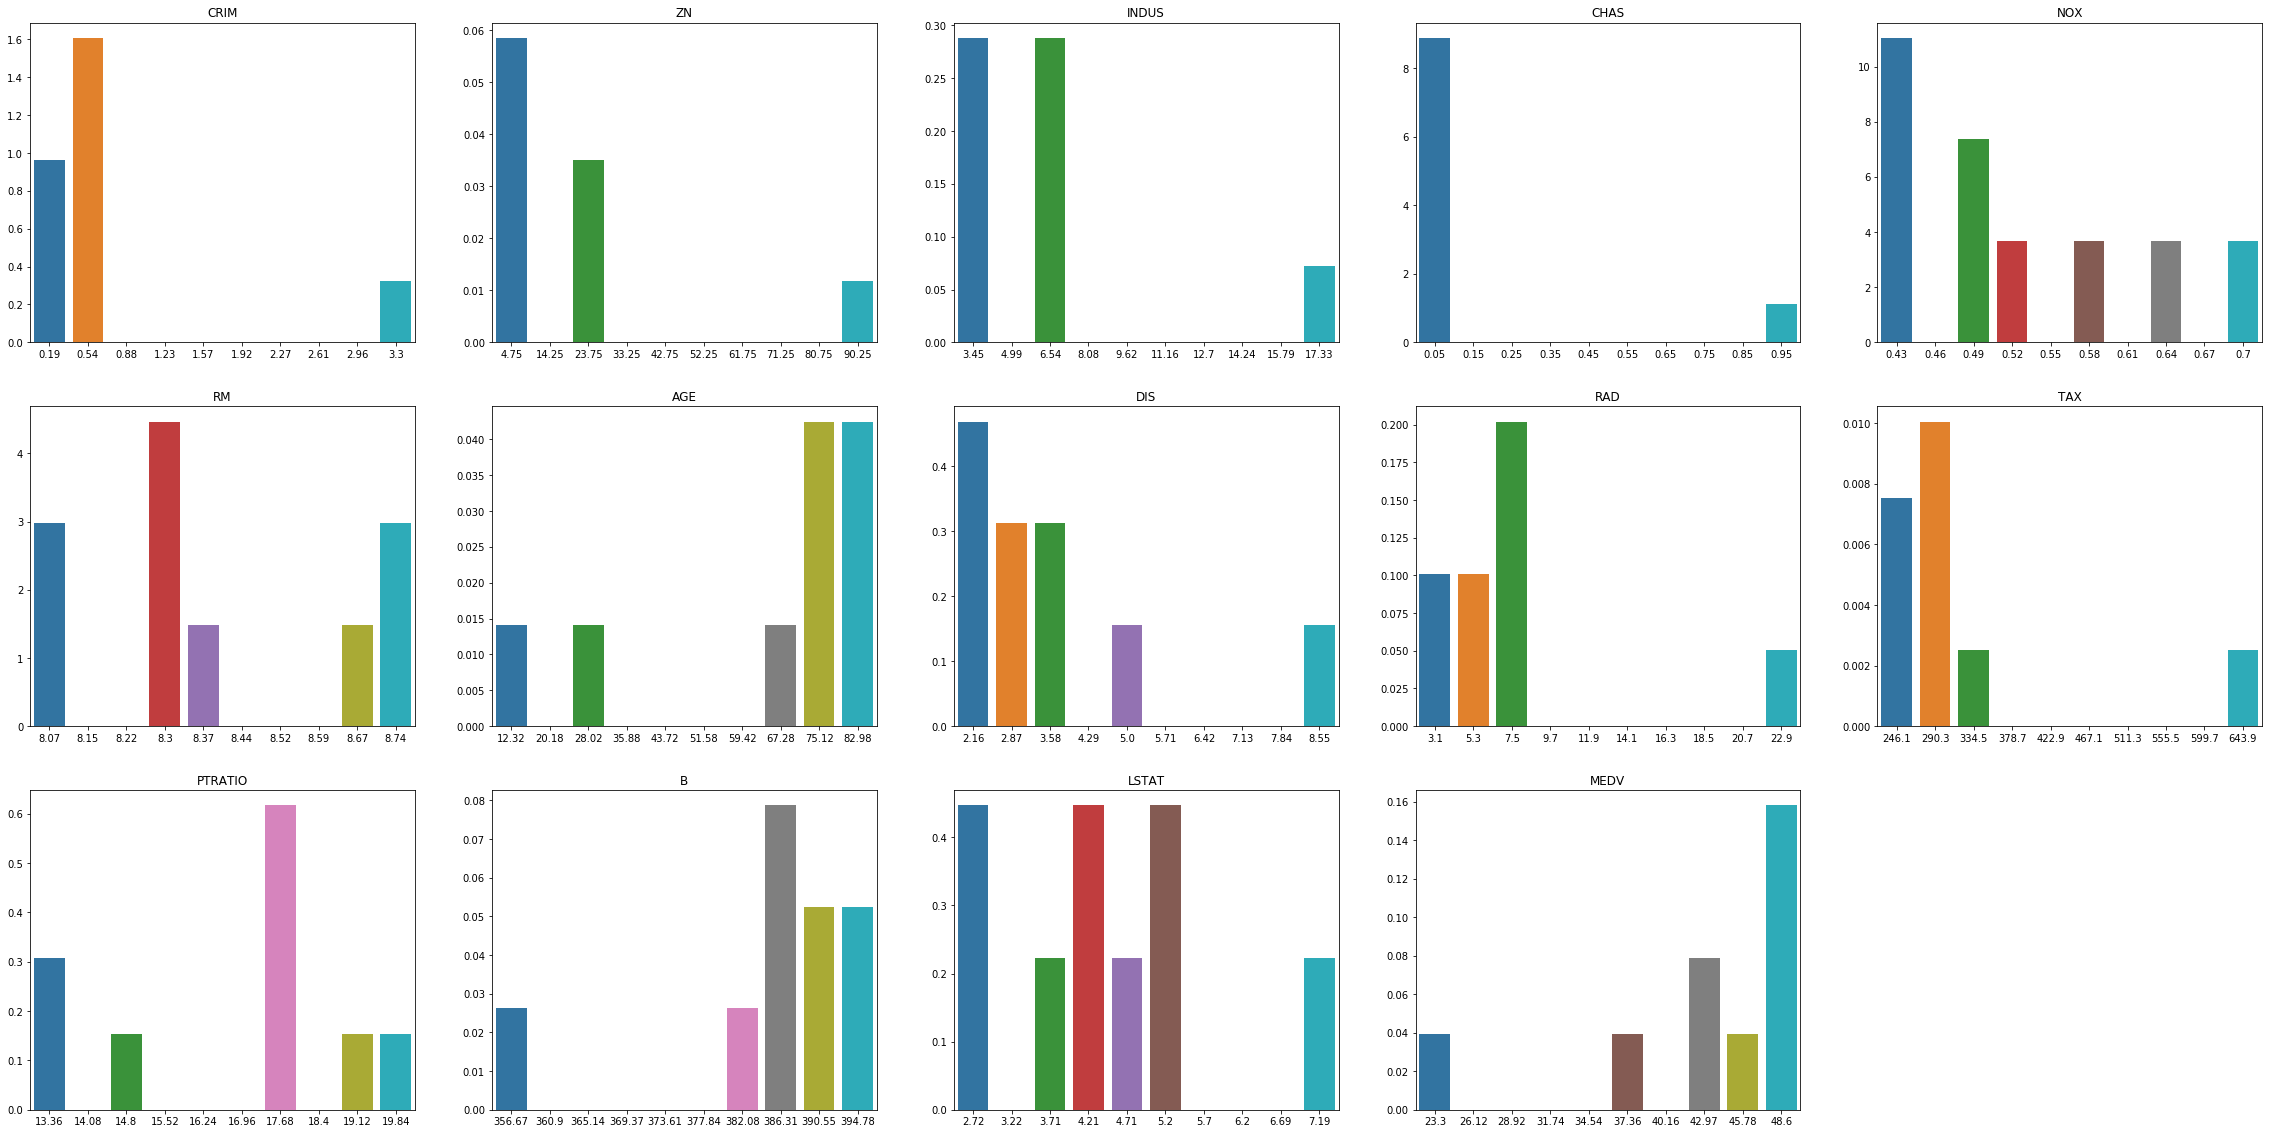

In [16]:
ix = X[X['RM'] > 8].copy()
plt.figure(figsize = (40, 20))
cnt = 0
for icol in range(Ncol):
    cnt += 1
    plt.subplot(3, 5, cnt)
    idata = ix.iloc[:, icol].values
    hist, binedges = np.histogram(idata, density = True)
    xx = (binedges[:-1] + binedges[1:]) / 2
    xx = xx.round(decimals = 2)
    sns.barplot(xx, hist)
    plt.title(X.columns[icol])